In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


SibSp is the number of siblings / spouses aboard the Titanic.   
Parch is the nb of parents / children aboard the Titanic.
3 possible ports of embarkation: Southampton (Hampshire), Cherbourg (Normandy) and Queenstown (Munster, Ireland).

In [4]:
train.shape

(891, 12)

In [5]:
#convert categorical variable into dummy variables
dummies = pd.get_dummies(train['Sex'])
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [6]:
train = pd.concat([train, dummies], axis=1)

In [7]:
train.drop('Sex', axis=1 ,inplace=True)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [9]:
lm = LinearRegression()
# X represents the variables used to predict. Y is the predicted variable.
X = train[['female']]
Y = train['Survived']
# use lm.fit to train the model
lm.fit(X,Y)

LinearRegression()

In [10]:
Yhat = lm.predict(X)
Yhat[:10]

array([0.18890815, 0.74203822, 0.74203822, 0.74203822, 0.18890815,
       0.18890815, 0.18890815, 0.18890815, 0.74203822, 0.74203822])

In [11]:
# the intercept in a regression model is the expected mean value of Y when all X = 0
# Here it means the value of Y when the passenger is not a female
lm.intercept_

0.18890814558058877

In [13]:
# the coefficient represents the steepness of the slope
lm.coef_

array([0.55313007])

<AxesSubplot:xlabel='male', ylabel='Survived'>

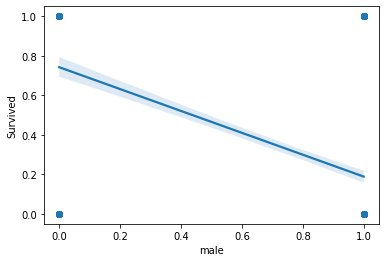

In [22]:
sns.regplot(x='male', y='Survived', data=train)
# the spray corresponds to the confidence interval

<AxesSubplot:xlabel='Age', ylabel='Survived'>

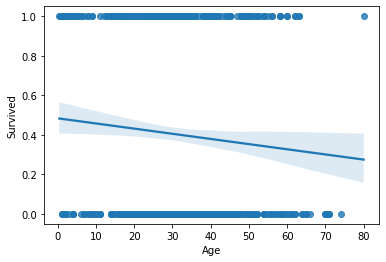

In [18]:
sns.regplot(x='Age', y='Survived', data=train)

We can see that younger people have a higher rate of survival

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

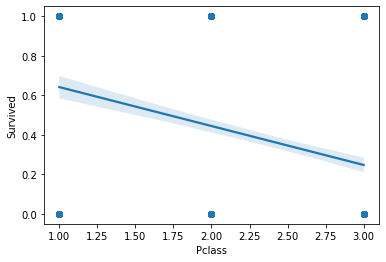

In [19]:
sns.regplot(x='Pclass', y='Survived', data=train)

The higher the passenger class, the better the survival rate

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

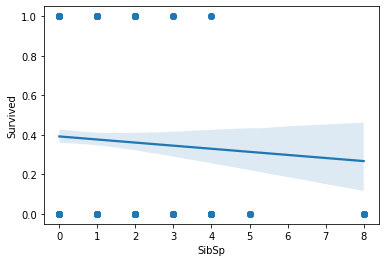

In [21]:
sns.regplot(x='SibSp', y='Survived', data=train)

Low correlation between the number of siblings / spouses and the survival rate.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

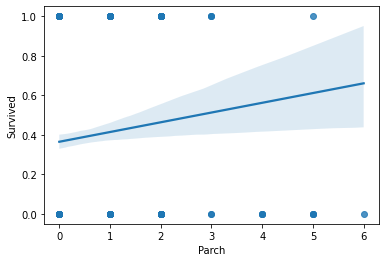

In [23]:
sns.regplot(x='Parch', y='Survived', data=train)

Higher the # of parents / children, better the survival rate

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

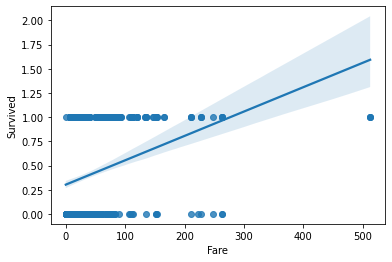

In [24]:
sns.regplot(x='Fare', y='Survived', data=train)

Higher the fare, better the survival rate

In [28]:
#convert categorical variable into dummy variables
ports = pd.get_dummies(train['Embarked'])
ports.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [29]:
train = pd.concat([train, ports], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


<AxesSubplot:xlabel='C', ylabel='Survived'>

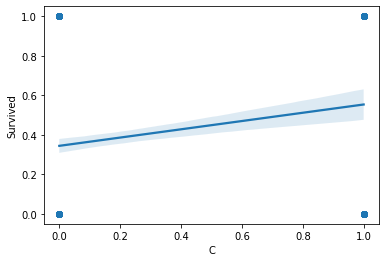

In [30]:
sns.regplot(x='C', y='Survived', data=train)

People that embarked in Cherbourg, had a better survival rate

<AxesSubplot:xlabel='S', ylabel='Survived'>

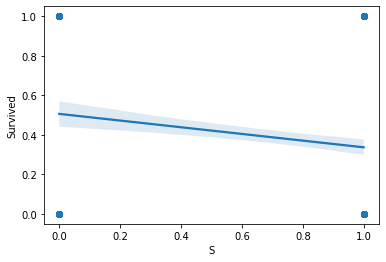

In [32]:
sns.regplot(x='S', y='Survived', data=train)

People that embarked in Southampton, had a lower survival rate

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


In [37]:
meanAge = train['Age'].mean()

In [38]:
meanAge

29.69911764705882

In [42]:
train['Age'].fillna(meanAge, inplace=True)

In [43]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
female           0
male             0
C                0
Q                0
S                0
dtype: int64

In [44]:
Z = train[['female','Pclass','Age','SibSp', 'Parch', 'Fare', 'C']]
Z.head()

,female,Pclass,Age,SibSp,Parch,Fare,C
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,0


In [45]:
Z.isna().sum()

female    0
Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
C         0
dtype: int64

In [46]:
lm.fit(Z, Y)

LinearRegression()

In [47]:
Yhat = lm.predict(Z)

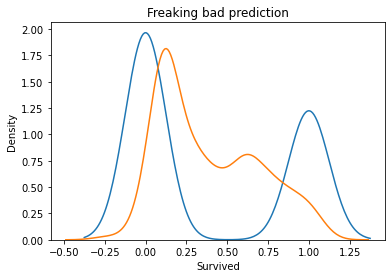

In [55]:
sns.kdeplot(data=train, x='Survived')
sns.kdeplot(data=Yhat)
plt.title('Freaking bad prediction')
plt.show()

In [59]:
prediction = Yhat.round()

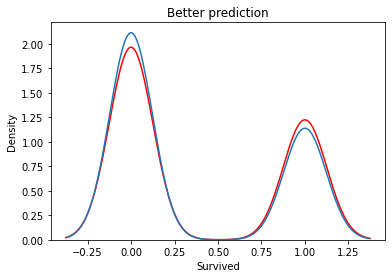

In [61]:
sns.kdeplot(data=train, x='Survived', color='r')
sns.kdeplot(data=prediction)
plt.title('Better prediction')
plt.show()

In [73]:
def prepare_df(df):
    dummies = pd.get_dummies(df['Sex'])
    df = pd.concat([df, dummies], axis=1)
    df.drop('Sex', axis=1 ,inplace=True)

    ports = pd.get_dummies(df['Embarked'])
    df = pd.concat([df, ports], axis=1)
    return df

In [68]:
test = pd.read_csv('test.csv')

In [75]:
test = prepare_df(test)

In [79]:
Z.columns

Index(['female', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C'], dtype='object')

In [80]:
test[Z.columns].head()

,female,Pclass,Age,SibSp,Parch,Fare,C
0,0,3,34.5,0,0,7.8292,0
1,1,3,47.0,1,0,7.0000,0
2,0,2,62.0,0,0,9.6875,0
3,0,3,27.0,0,0,8.6625,0
4,1,3,22.0,1,1,12.2875,0


In [94]:
test_Z = test.loc[:, Z.columns]

In [95]:
test_Z.isna().sum()

female     0
Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
C          0
dtype: int64

In [96]:
meanAge = test_Z["Age"].mean()
meanFare = test_Z["Fare"].mean()

In [97]:
test_Z["Age"].fillna(meanAge, inplace=True)
test_Z["Fare"].fillna(meanFare, inplace=True)

In [100]:
Yhat_test = lm.predict(test_Z).round()

In [101]:
predSeries = pd.Series(Yhat_test)

In [102]:
predSeries

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Length: 418, dtype: float64

In [104]:
predSeries.value_counts()

0.0    264
1.0    154
dtype: int64

In [114]:
submission = pd.concat([test['PassengerId'], predSeries], axis=1).astype(int)
submission.columns = ['PassengerId','Survived']

In [115]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [67]:
exampleSub = pd.read_csv('gender_submission.csv')
exampleSub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [116]:
submission.to_csv('submission.csv',index=False)